# Imports and Setup

In [ ]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Embeddings laden 

In [24]:
embeddings_path = "..\data\esmc-embeddings\embeddings_complete.npz"
data = np.load(embeddings_path, allow_pickle=True)

# Extracting the embeddings and labels
X = data['embeddings']
y = data['labels']

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\decha\AppData\Local\Temp\ipykernel_448\836710936.py:1: SyntaxWarning: invalid escape sequence '\d'
  embeddings_path = "..\data\esmc-embeddings\embeddings_complete.npz"


In [25]:
# Überprüfe die Form der Embeddings
print("Form der Embeddings:", X.shape)  # Sollte (1250, 31, 960) sein

# Verschiedene Strategien zum Extrahieren von Features

# 1. Frühes Layer (z.B. erstes Element in der Sequenz)
X_early = X[:, 0, :]
print("Form des frühen Layers:", X_early.shape)

# 2. Mittleres Layer (mittleres Element in der Sequenz)
middle_idx = X.shape[1] // 2
X_middle = X[:, middle_idx, :]
print("Form des mittleren Layers:", X_middle.shape)

# 3. Spätes Layer (letztes Element in der Sequenz)
X_late = X[:, -1, :]
print("Form des späten Layers:", X_late.shape)

# 4. Durchschnitt über alle drei Ansätze
X_avg = np.mean(np.stack([X_early, X_middle, X_late]), axis=0)
print("Form des gemittelten Layers:", X_avg.shape)

Form der Embeddings: (1250, 31, 960)
Form des frühen Layers: (1250, 960)
Form des mittleren Layers: (1250, 960)
Form des späten Layers: (1250, 960)
Form des gemittelten Layers: (1250, 960)


In [ ]:
# Liste der verschiedenen Feature-Sets
feature_sets = {
    "Frühes Layer": X_early,
    "Mittleres Layer": X_middle,
    "Spätes Layer": X_late,
    "Gemittelt": X_avg
}

# Ergebnisse speichern
results = {}

# Jedes Feature-Set trainieren und evaluieren
for name, features in feature_sets.items():
    print(f"\n=== Training mit {name} ===")
    
    # Daten aufteilen
    X_train, X_test, y_train, y_test = train_test_split(
        features, y, test_size=0.2, random_state=42
    )
    
    # MLP trainieren
    mlp = MLPClassifier(
        hidden_layer_sizes=(50,),
        activation='relu',
        alpha=0.0001,
        solver='sgd',
        learning_rate='adaptive',
        learning_rate_init=0.01,
        max_iter=300,
        random_state=42,
        verbose=True
    )
    
    mlp.fit(X_train, y_train)
    
    # Vorhersagen machen und evaluieren
    y_pred = mlp.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f"Genauigkeit: {accuracy:.4f}")
    print("Klassifikationsbericht:")
    print(report)
    
    # Ergebnisse speichern
    results[name] = {
        "accuracy": accuracy,
        "report": report,
        "model": mlp
    }

# Zusammenfassung anzeigen
print("\n=== Zusammenfassung ===")
for name, result in results.items():
    print(f"{name}: Genauigkeit = {result['accuracy']:.4f}")

In [ ]:
parameter_space = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.001, 0.01]
}

mlp = MLPClassifier(max_iter=500)
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=5)
clf.fit(X_train, y_train)

# Beste Parameter ausgeben
print("Beste Parameter:", clf.best_params_)


=== Training mit Frühes Layer ===
Iteration 1, loss = 1.27690693
Iteration 2, loss = 1.07342042
Iteration 3, loss = 0.96987568
Iteration 4, loss = 0.92513796
Iteration 5, loss = 0.88061485
Iteration 6, loss = 0.85364241
Iteration 7, loss = 0.82813671
Iteration 8, loss = 0.81427715
Iteration 9, loss = 0.79529105
Iteration 10, loss = 0.78263175
Iteration 11, loss = 0.77236949
Iteration 12, loss = 0.75525360
Iteration 13, loss = 0.74730087
Iteration 14, loss = 0.73285557
Iteration 15, loss = 0.72671324
Iteration 16, loss = 0.71878256
Iteration 17, loss = 0.71116923
Iteration 18, loss = 0.69717535
Iteration 19, loss = 0.69532441
Iteration 20, loss = 0.68510894
Iteration 21, loss = 0.67734535
Iteration 22, loss = 0.66581980
Iteration 23, loss = 0.65729985
Iteration 24, loss = 0.65115190
Iteration 25, loss = 0.64027170
Iteration 26, loss = 0.63494435
Iteration 27, loss = 0.63279275
Iteration 28, loss = 0.62401968
Iteration 29, loss = 0.61790246
Iteration 30, loss = 0.60774344
Iteration 31, 

C:\Users\decha\PycharmProjects\pythonProject\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


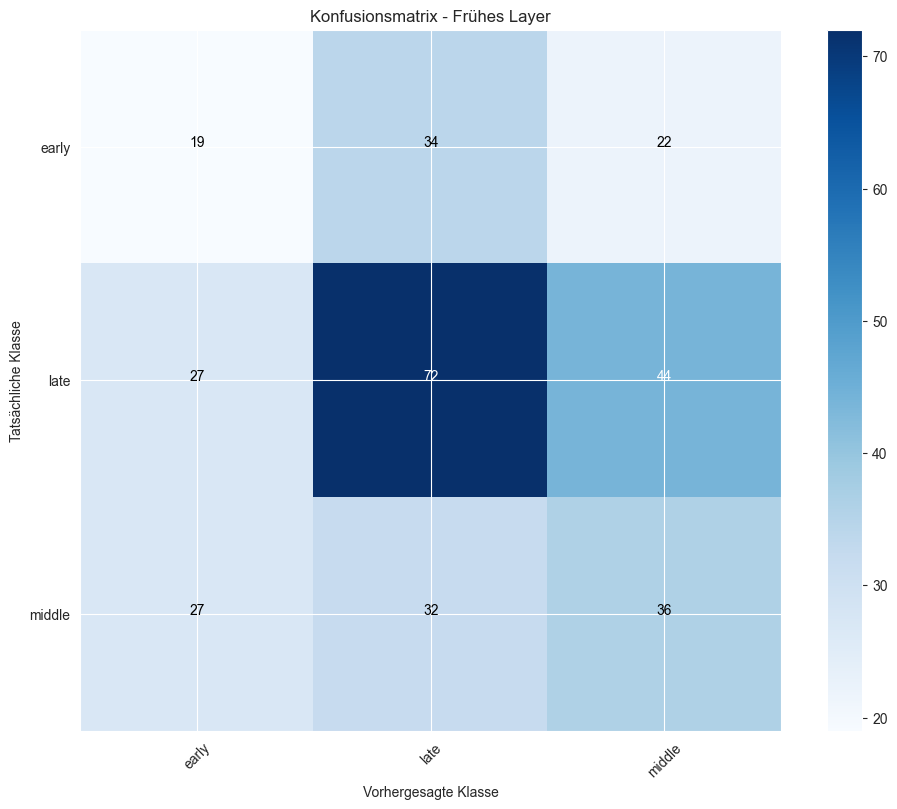

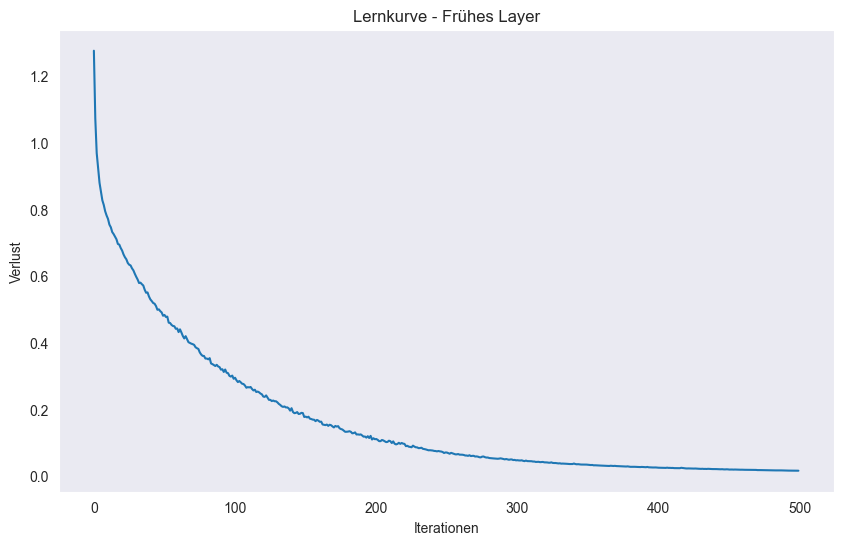

Modell wurde als 'mlp_modell_frühes_layer.pkl' gespeichert

=== Training mit Mittleres Layer ===
Iteration 1, loss = 1.30514235
Iteration 2, loss = 1.08067393
Iteration 3, loss = 0.91088089
Iteration 4, loss = 0.81801781
Iteration 5, loss = 0.73331726
Iteration 6, loss = 0.66164851
Iteration 7, loss = 0.60466892
Iteration 8, loss = 0.55622573
Iteration 9, loss = 0.51293863
Iteration 10, loss = 0.47329949
Iteration 11, loss = 0.43722462
Iteration 12, loss = 0.40181212
Iteration 13, loss = 0.37062328
Iteration 14, loss = 0.34117839
Iteration 15, loss = 0.31440614
Iteration 16, loss = 0.29050692
Iteration 17, loss = 0.26618566
Iteration 18, loss = 0.24759438
Iteration 19, loss = 0.22760928
Iteration 20, loss = 0.21122730
Iteration 21, loss = 0.19511489
Iteration 22, loss = 0.17975941
Iteration 23, loss = 0.16866307
Iteration 24, loss = 0.15586933
Iteration 25, loss = 0.14366598
Iteration 26, loss = 0.13412924
Iteration 27, loss = 0.12563745
Iteration 28, loss = 0.11701255
Iteration 29, lo

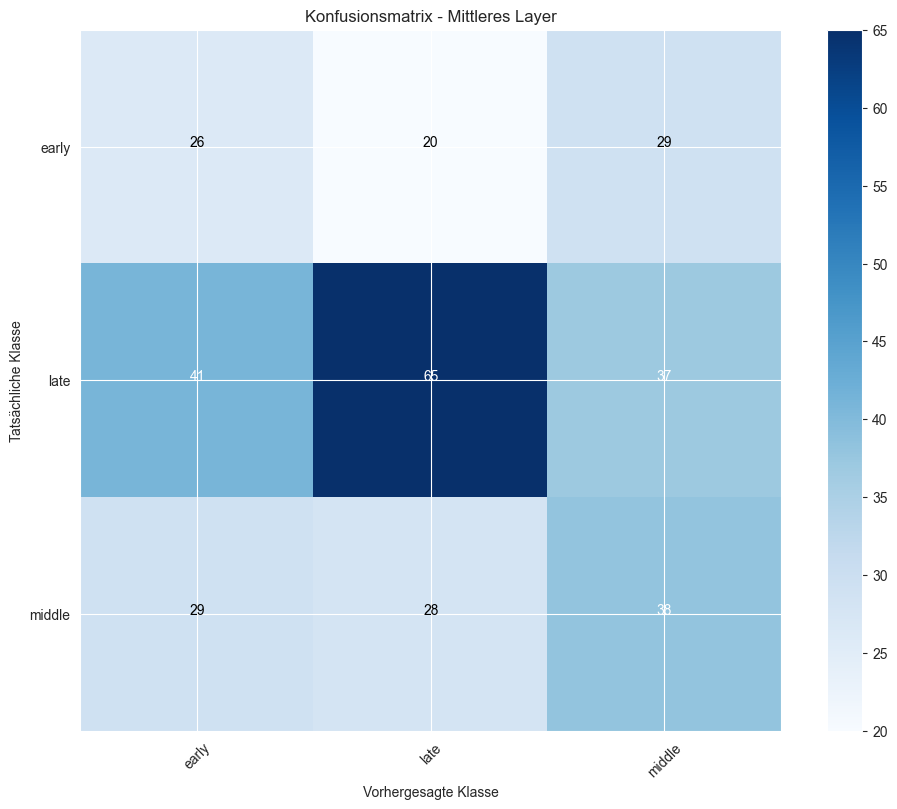

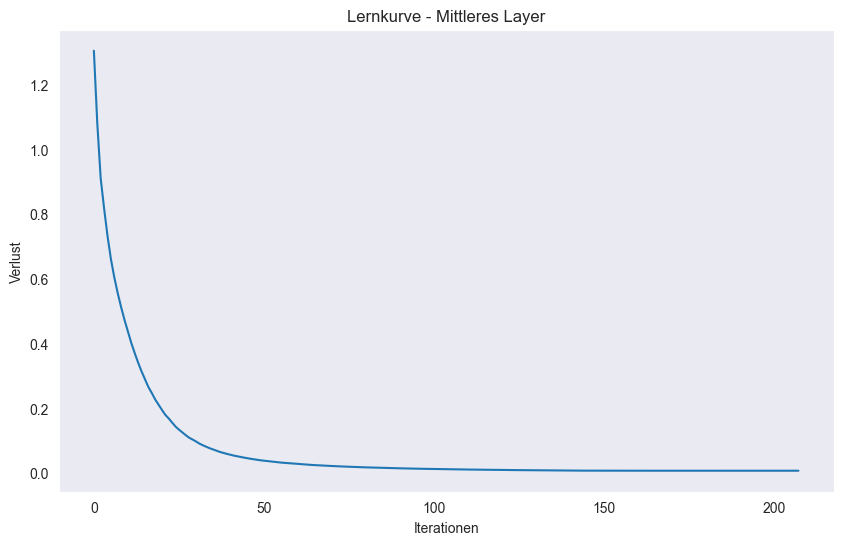

Modell wurde als 'mlp_modell_mittleres_layer.pkl' gespeichert

=== Training mit Spätes Layer ===
Iteration 1, loss = 1.28893220
Iteration 2, loss = 1.02795760
Iteration 3, loss = 0.90285040
Iteration 4, loss = 0.82295675
Iteration 5, loss = 0.74946536
Iteration 6, loss = 0.68428386
Iteration 7, loss = 0.63856778
Iteration 8, loss = 0.59361425
Iteration 9, loss = 0.55815012
Iteration 10, loss = 0.52069534
Iteration 11, loss = 0.48922503
Iteration 12, loss = 0.45866506
Iteration 13, loss = 0.42594814
Iteration 14, loss = 0.39639825
Iteration 15, loss = 0.37230106
Iteration 16, loss = 0.35021612
Iteration 17, loss = 0.32594492
Iteration 18, loss = 0.30662642
Iteration 19, loss = 0.28922252
Iteration 20, loss = 0.26952508
Iteration 21, loss = 0.25299004
Iteration 22, loss = 0.23622566
Iteration 23, loss = 0.22144193
Iteration 24, loss = 0.21005742
Iteration 25, loss = 0.19744593
Iteration 26, loss = 0.18894758
Iteration 27, loss = 0.17759722
Iteration 28, loss = 0.16581164
Iteration 29, lo

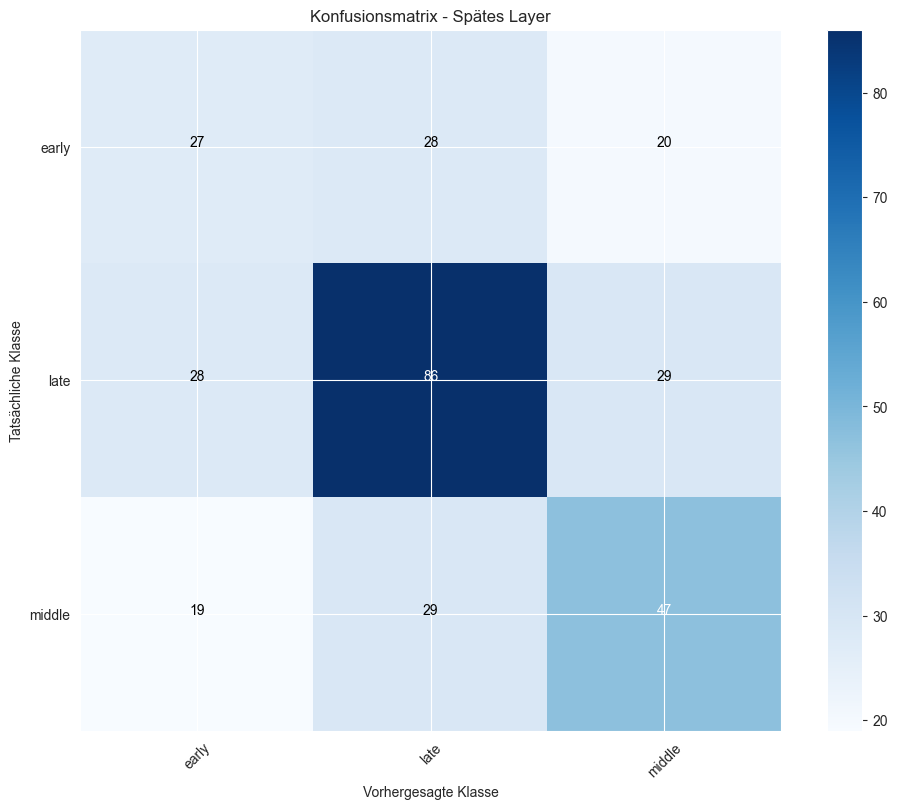

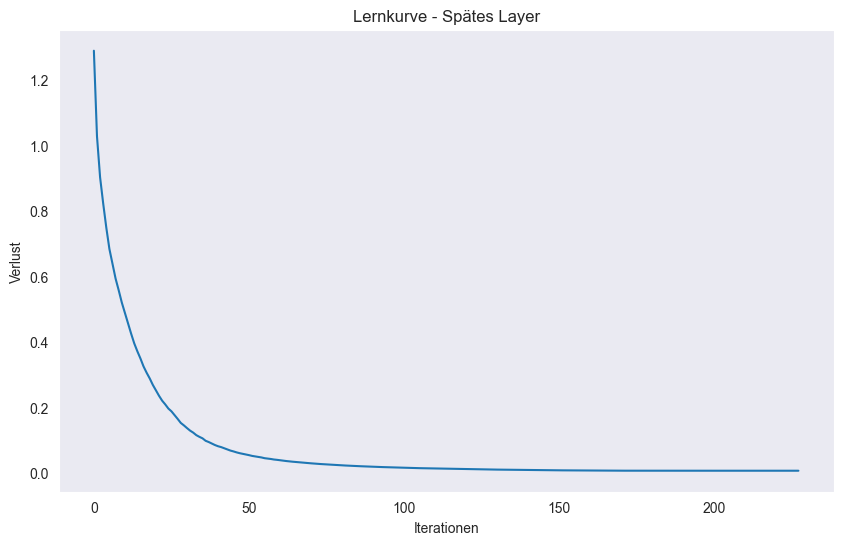

Modell wurde als 'mlp_modell_spätes_layer.pkl' gespeichert

=== Training mit Gemittelt ===
Iteration 1, loss = 1.31098726
Iteration 2, loss = 1.07956986
Iteration 3, loss = 0.91299183
Iteration 4, loss = 0.81636878
Iteration 5, loss = 0.72637404
Iteration 6, loss = 0.65487080
Iteration 7, loss = 0.59664643
Iteration 8, loss = 0.54812175
Iteration 9, loss = 0.50488597
Iteration 10, loss = 0.46504183
Iteration 11, loss = 0.42985230
Iteration 12, loss = 0.39452563
Iteration 13, loss = 0.36383874
Iteration 14, loss = 0.33467278
Iteration 15, loss = 0.30828130
Iteration 16, loss = 0.28477351
Iteration 17, loss = 0.26093928
Iteration 18, loss = 0.24273380
Iteration 19, loss = 0.22364297
Iteration 20, loss = 0.20723888
Iteration 21, loss = 0.19219049
Iteration 22, loss = 0.17709244
Iteration 23, loss = 0.16581235
Iteration 24, loss = 0.15366131
Iteration 25, loss = 0.14197216
Iteration 26, loss = 0.13243285
Iteration 27, loss = 0.12412146
Iteration 28, loss = 0.11569506
Iteration 29, loss = 0

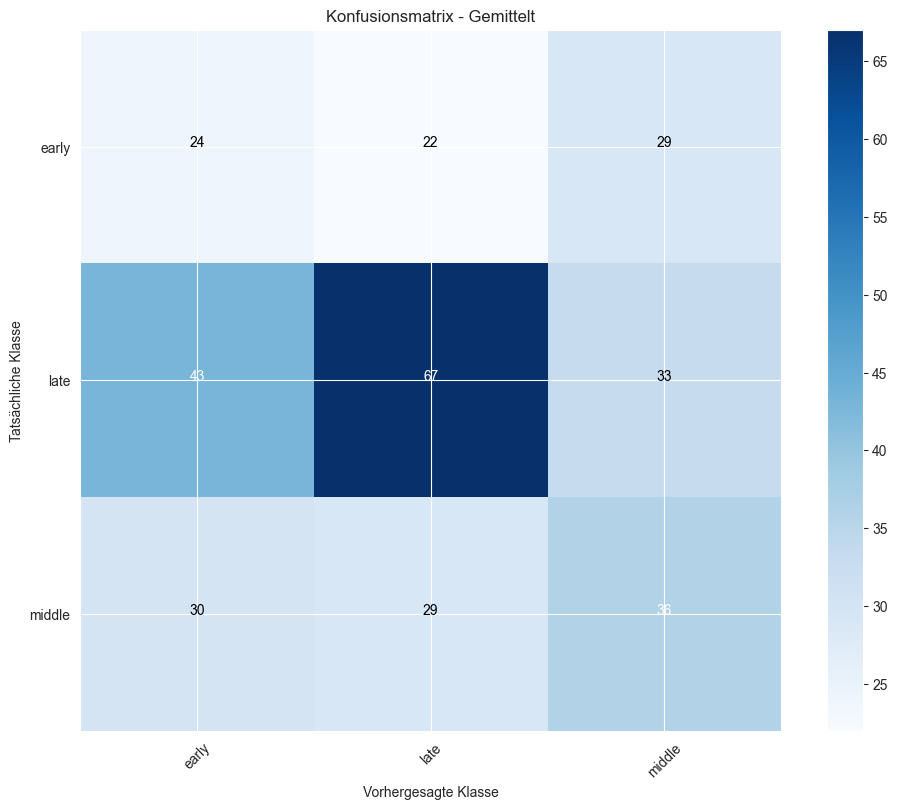

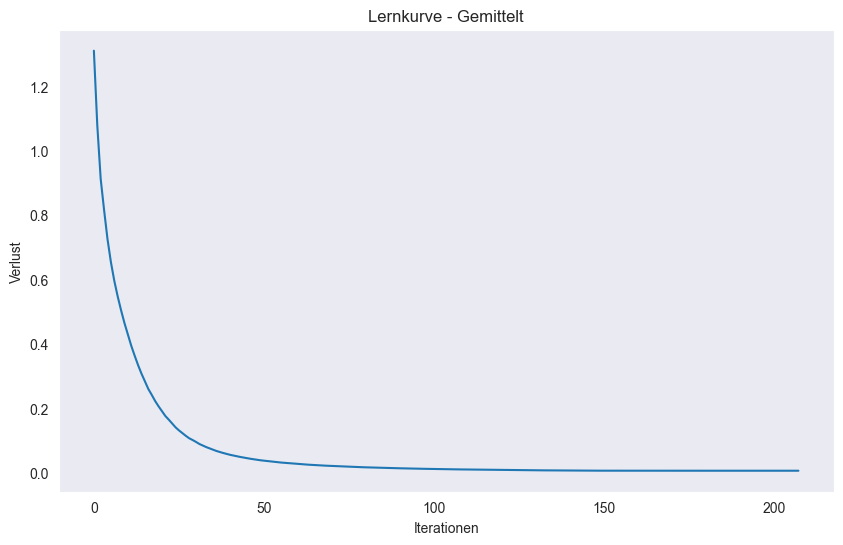

Modell wurde als 'mlp_modell_gemittelt.pkl' gespeichert

=== Zusammenfassung ===
Frühes Layer: Genauigkeit = 0.4058
Mittleres Layer: Genauigkeit = 0.4121
Spätes Layer: Genauigkeit = 0.5112
Gemittelt: Genauigkeit = 0.4058

Bestes Modell: Spätes Layer mit Genauigkeit 0.5112


In [28]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# Liste der verschiedenen Feature-Sets
feature_sets = {
    "Frühes Layer": X_early,
    "Mittleres Layer": X_middle,
    "Spätes Layer": X_late,
    "Gemittelt": X_avg
}

# Ergebnisse speichern
results = {}

# Jedes Feature-Set trainieren und evaluieren
for name, features in feature_sets.items():
    print(f"\n=== Training mit {name} ===")
    
    start_time = time.time()

    # Hier features statt X verwenden (2D statt 3D)
    X_train, X_test, y_train, y_test = train_test_split(
        features, y, test_size=0.25, random_state=42
    )
    
    # Daten standardisieren
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Die besten Parameter aus dem vorherigen GridSearch verwenden
    best_mlp = MLPClassifier(
        hidden_layer_sizes=(50,),
        activation='relu',
        alpha=0.0001,
        solver='sgd',
        learning_rate='adaptive',
        learning_rate_init=0.01,
        max_iter=500,
        random_state=42,
        verbose=True
    )
    
    # Modell trainieren
    best_mlp.fit(X_train_scaled, y_train)
    
    # Dauer berechnen
    duration = time.time() - start_time
    print(f"Training dauerte {duration:.2f} Sekunden")
    
    # Vorhersagen machen
    y_pred = best_mlp.predict(X_test_scaled)
    
    # Evaluation
    print(f"\nGenauigkeit auf Testdaten: {best_mlp.score(X_test_scaled, y_test):.4f}")
    print("\nKlassifikationsbericht:")
    print(classification_report(y_test, y_pred))

    # Konfusionsmatrix visualisieren
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f"Konfusionsmatrix - {name}")
    plt.colorbar()
    classes = np.unique(y_test)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Werte in der Matrix anzeigen
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Tatsächliche Klasse')
    plt.xlabel('Vorhergesagte Klasse')
    plt.show()

    # Lernkurve visualisieren
    if hasattr(best_mlp, 'loss_curve_'):
        plt.figure(figsize=(10, 6))
        plt.plot(best_mlp.loss_curve_)
        plt.title(f'Lernkurve - {name}')
        plt.xlabel('Iterationen')
        plt.ylabel('Verlust')
        plt.grid()
        plt.show()

    # Ergebnisse speichern
    results[name] = {
        "accuracy": best_mlp.score(X_test_scaled, y_test),
        "model": best_mlp
    }

    # Modell speichern
    joblib.dump(best_mlp, f'mlp_modell_{name.replace(" ", "_").lower()}.pkl')
    print(f"Modell wurde als 'mlp_modell_{name.replace(' ', '_').lower()}.pkl' gespeichert")

# Zusammenfassung anzeigen
print("\n=== Zusammenfassung ===")
for name, result in results.items():
    print(f"{name}: Genauigkeit = {result['accuracy']:.4f}")

# Das beste Modell identifizieren
best_name = max(results, key=lambda k: results[k]["accuracy"])
print(f"\nBestes Modell: {best_name} mit Genauigkeit {results[best_name]['accuracy']:.4f}")